In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltz
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


First 5 X values:
 [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]]

First 5 y values:
 [[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]]


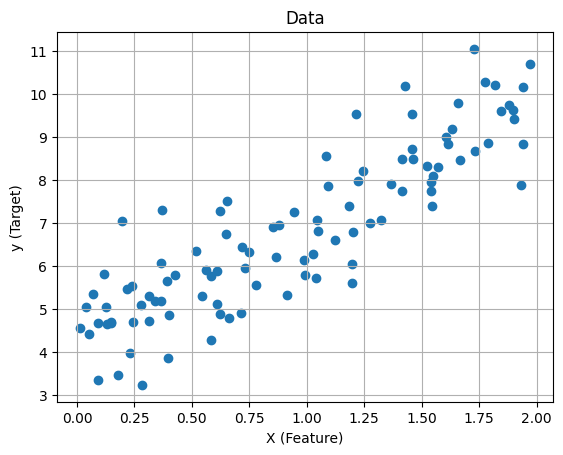

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 data points for X
X = 2 * np.random.rand(100, 1)

# Generate y using a linear equation y = 4 + 3x + noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Let's look at the first 5 data points
print("First 5 X values:\n", X[:5])
print("\nFirst 5 y values:\n", y[:5])

# Visualize the data
plt.scatter(X, y)
plt.title("Data")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.grid(True)
plt.show()

First testing the data with normal Linear regression

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("For Linear Regression")
print("The R2 score is: ", r2_score(y_test, y_pred))
print("The cross val score is: ", np.mean(cross_val_score(lr, X, y, cv=10)))

For Linear Regression
The R2 score is:  0.8072059636181392
The cross val score is:  0.7196196932113306


In [6]:
print(lr.coef_)
print(lr.intercept_)

[[2.79932366]]
[4.14291332]


In [7]:
class GradientDescent:
    def __init__(self, learning_rate, epochs):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, x_train, y_train):
        """Starting off by coefficent = 1 and intercept = 0, then updating each"""
        self.coef_ = 1
        self.intercept_ = 0
        
        for i in range(self.epochs):
            """first we update intercept then coefficent"""
            
            # updating the intercept
            loss_func = -2 * np.sum(y_train - (self.coef_ * x_train) - self.intercept_)
            step_size = self.learning_rate * loss_func
            self.intercept_ = self.intercept_ - step_size
            
            loss_func_coef = -2 * np.sum((y_train - (self.coef_ * x_train) - self.intercept_) * x_train)
            step_size_coef = self.learning_rate * loss_func_coef
            self.coef_ = self.coef_ - step_size_coef
            
        print(self.coef_)
        print(self.intercept_)
            
        
    
    def predict(self, x_test):
        pred = (self.coef_ * x_test) + self.intercept_
        return pred

In [8]:
model = GradientDescent(learning_rate=0.01, epochs=120)
model.fit(x_train, y_train)


2.799323657480287
4.14291331945855


In [9]:
print(lr.coef_)
print(lr.intercept_)

[[2.79932366]]
[4.14291332]


In [10]:
y_pred1 = model.predict(x_test)
print(r2_score(y_test, y_pred1))

0.807205963618138
